C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\andrgome\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

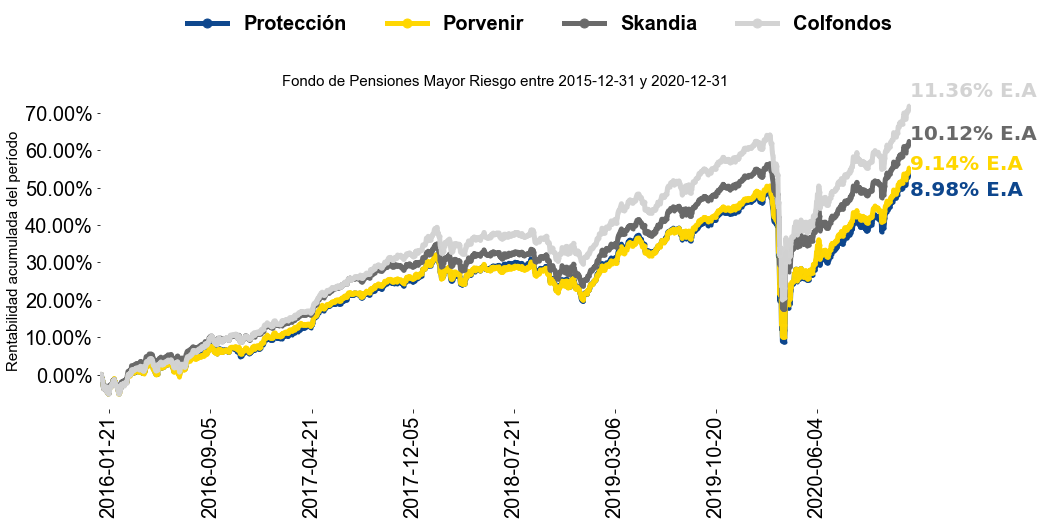

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from sodapy import Socrata


#Clave API para bajar datos de www.datos.gov.co
client = Socrata("www.datos.gov.co",
                 "Oy0pJTAMwxGuC0c5SBC9nuuAU",
                 username="43xcm1yx3xh1eb5lv8e374g1s",
                 password="1zt8gsxe1mfh3h6fyh6281n1qitip816l2d6wnc1zvvs2dyidz")


# df = pd.read_csv('D:/andrgome/Documents/BDPython/BD_PENSIONESOBL.csv',encoding='latin-1')

#Info FONDOS DE PENSIONES
VU_FONDOS_PENSIONES_OBL = client.get("uawh-cjvi", limit=5000000)
VU_FONDOS_PENSIONES_OBL_df = pd.DataFrame.from_records(VU_FONDOS_PENSIONES_OBL)
VU_FONDOS_PENSIONES_OBL_df.sort_values('fecha', inplace = True)
# VU_FONDOS_PENSIONES_OBL_df['fecha'] = pd.to_datetime(VU_FONDOS_PENSIONES_OBL_df['fecha'])
VU_FONDOS_PENSIONES_OBL_df['valor_unidad'] = VU_FONDOS_PENSIONES_OBL_df['valor_unidad'].astype(float)


#Fondo de Pensiones Retiro Programado
#Fondo de Pensiones Conservador
#Fondo de Pensiones Moderado
#Fondo de Pensiones Mayor Riesgo
#Fondo de Cesantias Largo Plazo


Tipo_Fondo = 'Fondo de Pensiones Mayor Riesgo'
Fecha_inicial = '2015-12-31'
Fecha_final = '2020-12-31'
x = ((pd.to_datetime(Fecha_final)-pd.to_datetime(Fecha_inicial))/8).days
años = (((pd.to_datetime(Fecha_final)-pd.to_datetime(Fecha_inicial))).days)/365

# #Apliquemos filtros
df1 = VU_FONDOS_PENSIONES_OBL_df[VU_FONDOS_PENSIONES_OBL_df['nombre_fondo'].isin([Tipo_Fondo])]   #Filtro 1
df1['fecha'] = pd.to_datetime(df1['fecha'])
df1.set_index('fecha', inplace=True)
df1.sort_values(by=['fecha'],inplace=True)
df1 = df1.loc[Fecha_inicial:Fecha_final]
df1['valor_unidad'] = df1['valor_unidad'].astype(float) #Convertir a float la columna tasa

#Protección
df_prot = df1.loc[df1['nombre_entidad'].isin(["Proteccion"])]
df_prot['retorno_diario'] = df_prot['valor_unidad'][1:].values/df_prot['valor_unidad'][:-1]-1
df_prot['retorno_acumulado']=(1 + df_prot['retorno_diario']).cumprod() - 1
df_prot['retorno_acumulado'][1:]=df_prot['retorno_acumulado'][:-1]
df_prot.iloc[0,6]=0

#Porvenir
df_porv = df1.loc[df1['nombre_entidad'].isin(["Porvenir"])]
df_porv['retorno_diario'] = df_porv['valor_unidad'][1:].values/df_porv['valor_unidad'][:-1]-1
df_porv['retorno_acumulado']=(1 + df_porv['retorno_diario']).cumprod() - 1
df_porv['retorno_acumulado'][1:]=df_porv['retorno_acumulado'][:-1]
df_porv.iloc[0,6]=0

#Skandia
df_skandia = df1.loc[df1['nombre_entidad'].isin(["Skandia Pensiones Y Cesantías S.A."])]
df_skandia['retorno_diario'] = df_skandia['valor_unidad'][1:].values/df_skandia['valor_unidad'][:-1]-1
df_skandia['retorno_acumulado']=(1 + df_skandia['retorno_diario']).cumprod() - 1
df_skandia['retorno_acumulado'][1:]=df_skandia['retorno_acumulado'][:-1]
df_skandia.iloc[0,6]=0

#Colfondos
df_colfondos = df1.loc[df1['nombre_entidad'].isin(["Colfondos S.A. Pensiones Y Cesantias"])]
df_colfondos['retorno_diario'] = df_colfondos['valor_unidad'][1:].values/df_colfondos['valor_unidad'][:-1]-1
df_colfondos['retorno_acumulado']=(1 + df_colfondos['retorno_diario']).cumprod() - 1
df_colfondos['retorno_acumulado'][1:]=df_colfondos['retorno_acumulado'][:-1]
df_colfondos.iloc[0,6]=0

tick_spacing = x
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=20)

# #Gráfico
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(df_prot.index,df_prot['retorno_acumulado'],marker='o', linestyle='solid',linewidth = 5,color='#0D468D',alpha = 0.99,label='Protección',markersize=3)
ax.plot(df_porv.index,df_porv['retorno_acumulado'],marker='o', linestyle='solid',linewidth = 5,color='gold',alpha = 0.99,label='Porvenir',markersize=3)
ax.plot(df_skandia.index,df_skandia['retorno_acumulado'],marker='o', linestyle='solid',linewidth = 5,color='dimgrey',alpha = 0.99,label='Skandia',markersize=3)
ax.plot(df_colfondos.index,df_colfondos['retorno_acumulado'],marker='o', linestyle='solid',linewidth = 5,color='lightgrey',alpha = 0.99,label='Colfondos',markersize=3)
ax.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.3),ncol=4,markerscale=3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=20)
plt.xticks(fontname = "Arial",fontsize=20)
ax.set_title(Tipo_Fondo + ' entre ' + Fecha_inicial + " y " + Fecha_final, fontdict={'fontsize': 15, 'fontweight': 'medium'})
ax.title.set_fontfamily('arial')
plt.axis([Fecha_inicial, Fecha_final, None, None])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_ylabel('Rentabilidad acumulada del período',fontname = "Arial", fontsize=15,color='black')
plt.subplots_adjust(bottom=0.1, right=2.0, top=1.2)
plt.box(on=None)

r_porv = df_porv[['retorno_acumulado']].iloc[-1].values[0]
r_prot = df_prot[['retorno_acumulado']].iloc[-1].values[0]
r_colf = df_colfondos[['retorno_acumulado']].iloc[-1].values[0]
r_skan = df_skandia[['retorno_acumulado']].iloc[-1].values[0]
y = {"gold": r_porv,"#0D468D":r_prot, "lightgrey": r_colf,"dimgrey": r_skan}
colores = sorted(y, key=y.__getitem__)
rentabilidades = sorted(y.values())

plt.text(df_porv.index[-1], rentabilidades[0]-0.06, '{0:.2%}'.format((1+rentabilidades[0])**(1/años)-1)+' E.A', color=colores[0], fontsize=20,weight='bold')
plt.text(df_porv.index[-1], rentabilidades[1]-0.00, '{0:.2%}'.format((1+rentabilidades[1])**(1/años)-1)+' E.A', color=colores[1], fontsize=20,weight='bold')
plt.text(df_porv.index[-1], rentabilidades[2]+0.01, '{0:.2%}'.format((1+rentabilidades[2])**(1/años)-1)+' E.A', color=colores[2], fontsize=20,weight='bold')
plt.text(df_porv.index[-1], rentabilidades[3]+0.03, '{0:.2%}'.format((1+rentabilidades[3])**(1/años)-1)+' E.A', color=colores[3], fontsize=20,weight='bold')

plt.show()

In [38]:
df_colfondos

,codigo_entidad,codigo_patrimonio,nombre_entidad,nombre_fondo,valor_unidad,retorno_diario,retorno_acumulado
fecha,,,,,,,
2019-12-31,10,6000,Colfondos S.A. Pensiones Y Cesantias,Fondo de Pensiones Mayor Riesgo,53764.070000,0.000064,0.000000
2020-01-01,10,6000,Colfondos S.A. Pensiones Y Cesantias,Fondo de Pensiones Mayor Riesgo,53767.522881,0.002377,0.000064
2020-01-02,10,6000,Colfondos S.A. Pensiones Y Cesantias,Fondo de Pensiones Mayor Riesgo,53895.320000,0.000036,0.002441
2020-01-03,10,6000,Colfondos S.A. Pensiones Y Cesantias,Fondo de Pensiones Mayor Riesgo,53897.260000,0.000063,0.002477
2020-01-04,10,6000,Colfondos S.A. Pensiones Y Cesantias,Fondo de Pensiones Mayor Riesgo,53900.670000,0.000063,0.002541
2020-01-05,10,6000,Colfondos S.A. Pensiones Y Cesantias,Fondo de Pensiones Mayor Riesgo,53904.090000,0.000062,0.002604
2020-01-06,10,6000,Colfondos S.A. Pensiones Y Cesantias,Fondo de Pensiones Mayor Riesgo,53907.430000,-0.001546,0.002666
2020-01-07,10,6000,Colfondos S.A. Pensiones Y Cesantias,Fondo de Pensiones Mayor Riesgo,53824.090000,-0.000125,0.001116
2020-01-08,10,6000,Colfondos S.A. Pensiones Y Cesantias,Fondo de Pensiones Mayor Riesgo,53817.380000,0.001471,0.000992
